# Random Points

By Cascade Tuholske, June 2020

Goal of notebook is to randomly select points inside each
geography and return rasters values. <br><br>
**NOTE** CRS should be epsg:4326 for everything!

In [1]:
#### Dependencies
import numpy as np
import pandas as pd
import rasterio
import geopandas as gpd
from rasterstats import zonal_stats, gen_zonal_stats, gen_point_query
from glob import glob
import random
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn

In [2]:
def generate_random(number, polygon):
    """ explainer --- WHY SOME NAN - check
    """
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

In [3]:
#### File Paths & FNs
DATA_PATH = '/Users/cascade/Github/PopGridCompare/data/'

In [4]:
#### Load Polys
polys_fn = DATA_PATH+'raw/GDAM/gadm36_ESP_shp/gadm36_ESP_1.shp'
polys = gpd.read_file(polys_fn)
col = 'GID_1' # gdam level

In [5]:
# Git tif files
rst_fns = glob('/Users/cascade/Github/PopGridCompare/data/interim/*.tif')
rst_fns

['/Users/cascade/Github/PopGridCompare/data/interim/GHS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/LS15_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/ESRI16_matched.tif',
 '/Users/cascade/Github/PopGridCompare/data/interim/WP16_matched.tif']

In [6]:
# Subset for one polygon
polys = polys[['geometry', col]]
shp = polys['geometry'][0]

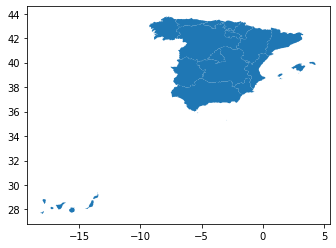

In [7]:
polys.plot()

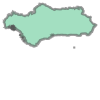

In [8]:
shp

In [9]:
# Generate Random points
n = 1000
ids = list(range(0,n))
points = gpd.GeoDataFrame(generate_random(n, shp))
points.rename(columns={0:'geometry'}, inplace=True)
points['ids'] = ids

In [10]:
def points_stats(points, rst_fn):
    """ add explainer
    """
    
    points_feats = gen_point_query(points, rst_fn, geojson_out=True)
    points_gpd = gpd.GeoDataFrame.from_features(points_feats, crs=polys.crs)
    
    return points_gpd

In [11]:
GHS15_pt = points_stats(points, rst_fns[0])
LS15_pt = points_stats(points, rst_fns[1])
ESRI16_pt = points_stats(points, rst_fns[2])
WP16_pt = points_stats(points, rst_fns[3])

Text(0.5, 1.0, 'Scatter of pixel-level pop values')

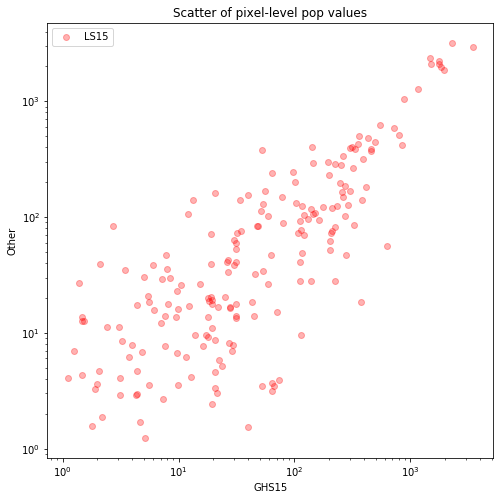

In [19]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
#plt.scatter(GHS15_pt['value'], LS15_pt['value'], color = 'blue', alpha = 0.3)
#plt.scatter(GHS15_pt['value'], ESRI16_pt['value'], color = 'green', alpha = 0.3)
plt.scatter(GHS15_pt['value'], WP16_pt['value'], color = 'red', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GHS15')
plt.ylabel('Other')
labels = ['LS15', 'ESRI16', 'WP15']
ax.legend(labels)
plt.title('Scatter of pixel-level pop values')

Text(0.5, 1.0, 'Scatter of pixel-level pop values')

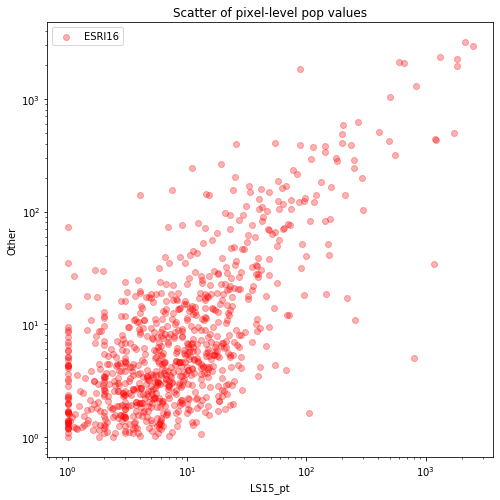

In [20]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
#plt.scatter(LS15_pt['value'], ESRI16_pt['value'], color = 'green', alpha = 0.3)
plt.scatter(LS15_pt['value'], WP16_pt['value'], color = 'red', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('LS15_pt')
plt.ylabel('Other')
labels = ['ESRI16', 'WP15']
ax.legend(labels)
plt.title('Scatter of pixel-level pop values')

Text(0.5, 1.0, 'Scatter of pixel-level pop values')

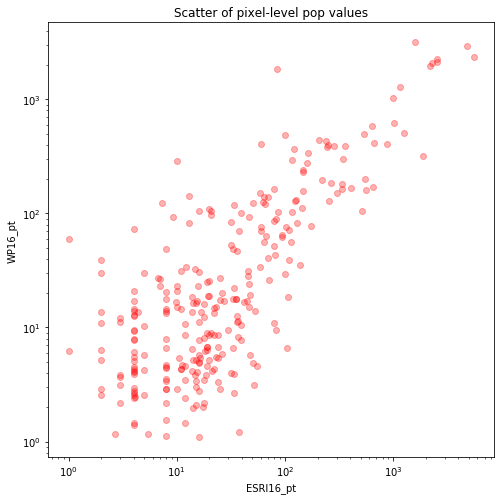

In [14]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
plt.scatter(ESRI16_pt['value'], WP16_pt['value'], color = 'red', alpha = 0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ESRI16_pt')
plt.ylabel('WP16_pt')
plt.title('Scatter of pixel-level pop values')

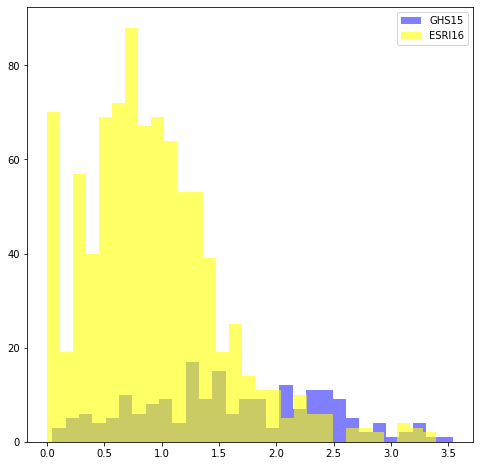

In [22]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
plt.hist(np.log10(GHS15_pt['value']), color = 'blue', alpha = 0.5, bins = 30);
#plt.hist(np.log10(ESRI16_pt['value']), color = 'green', alpha = 0.5, bins = 30);
#plt.hist(np.log10(WP16_pt['value']), color = 'red', alpha = 0.2, bins = 30);
plt.hist(np.log10(LS15_pt['value']), color = 'yellow', alpha = 0.6, bins = 30);
labels = ['GHS15', 'ESRI16', 'WP16', 'LS15']
ax.legend(labels)

/Users/cascade/miniconda3/envs/geo37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/cascade/miniconda3/envs/geo37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


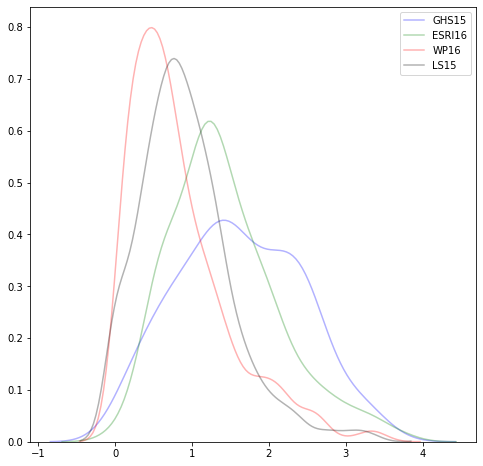

In [16]:
f, ax = plt.subplots(1, 1, figsize = (8, 8), sharex=True)
seaborn.kdeplot(np.log10(GHS15_pt['value']), color = 'blue', alpha = 0.3);
seaborn.kdeplot(np.log10(ESRI16_pt['value']), color = 'green', alpha = 0.3);
seaborn.kdeplot(np.log10(WP16_pt['value']), color = 'red', alpha = 0.3);
seaborn.kdeplot(np.log10(LS15_pt['value']), color = 'black', alpha = 0.3);
labels = ['GHS15', 'ESRI16', 'WP16', 'LS15']
ax.legend(labels)